# Importing Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import kaleido
import statsmodels.stats.api as sms
import statsmodels.api as sm
from matplotlib import rcParams
import statsmodels.formula.api as smf
from statsmodels.nonparametric.smoothers_lowess import lowess
import scipy.stats as stat
import plotly.express as px
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading Datasets

In [3]:
path_data = r'D:\ECM\DigitalLab\Projet_2\final_data\data_analysis.csv'
data_analysis = pd.read_csv(path_data)
data_analysis = data_analysis.drop(['Unnamed: 0'], axis = 1)

In [4]:
path_data_1 = r'D:\ECM\DigitalLab\Projet_2\final_data\final_data.csv'
data = pd.read_csv(path_data_1)
data = data.drop(['Unnamed: 0'], axis = 1)

# Model

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204534 entries, 0 to 204533
Data columns (total 42 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_projet                  204534 non-null  object 
 1   Nombre_pret                204534 non-null  int64  
 2   CA_REMISE_T                204534 non-null  float64
 3   situ_globale               204534 non-null  object 
 4   type_residence_1           204534 non-null  object 
 5   NB_PARTENAIRES             204534 non-null  float64
 6   LI_DESTN_FINCT             204534 non-null  object 
 7   nb_mois_dernier_entretien  204534 non-null  float64
 8   type_ptf_cc                204534 non-null  object 
 9   PNB                        204534 non-null  float64
 10  TP_VU_M12                  204534 non-null  float64
 11  NB_CONX_BAM_12M            204534 non-null  float64
 12  NB_CONX_WEB_12M            204534 non-null  float64
 13  MT_ENC_EP_BILAN            20

In [6]:
data = data.dropna()

# Stock

In [7]:
np.unique(data['BARCODE'])

array([0, 1, 2], dtype=int64)

In [8]:
data4 = data[data['BARCODE'] != 1]

In [9]:
data4['BARCODE'] = data4['BARCODE'].apply(lambda x : 1 if x == 2 else 0)

In [10]:
db_plot = data4.groupby('BARCODE').count().reset_index().sort_values(['id_projet'], ascending=False)
color = ['rgb(26, 140, 255)', 'rgb(77, 77, 255)', 'rgb(0, 0, 179)']
db_plot['BARCODE'] = db_plot['BARCODE'].astype(str)
fig = px.bar(db_plot, x='BARCODE', y='id_projet',color = 'BARCODE',labels={"BARCODE": "Barcodes"},color_discrete_sequence=color)
fig.show()

### t-test

In [11]:
l_column = ['Nombre_pret','CA_REMISE_T', 'NB_PARTENAIRES', 'nb_mois_dernier_entretien', 'PNB', 'NB_CONX_BAM_12M', 
        'NB_CONX_WEB_12M','MT_ENC_EP_BILAN','MT_ENC_COLLECTE','NB_MVT_DBTR__DAV_12M','SLD_COMPTA_DAV','MT_VERSE_EPRGN_DSOUSC',
            'SLD_MOY_DBIT_12_MOIS','SLD_MOY_CRDT_12_MOIS','N_TP_CREDIT_IMMO', 'N_TP_EPARGNE_ASS_VIE','N_TP_PROJET',
           'N_TP_CARTES', 'AGE','ANCIENNETE_MOIS','TX_CRED','DUREE_RESTANTE','MT_ACCORDE_PRET_PAR_CR','MT_PROCH_ECHCE_THRQ']
# H0 : col et Barcode sont dependents
# H1 : col et Barcode sont independents

for col in l_column :
    ss_dt1 = data4[col][data4['BARCODE'] == 0]
    ss_dt2 = data4[col][data4['BARCODE'] == 1]

    cm = sms.CompareMeans(sms.DescrStatsW(ss_dt1), sms.DescrStatsW(ss_dt2))
    print(col)
    print(cm.summary(usevar='unequal'))
    print('-------------------------------------------')

Nombre_pret
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1     -0.1836      0.016    -11.135      0.000      -0.216      -0.151
-------------------------------------------
CA_REMISE_T
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1  -4219.9482    233.423    -18.079      0.000   -4677.642   -3762.254
-------------------------------------------
NB_PARTENAIRES
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subs

-------------------------------------------
DUREE_RESTANTE
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1    -24.5220      1.553    -15.788      0.000     -27.568     -21.476
-------------------------------------------
MT_ACCORDE_PRET_PAR_CR
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1  -3.995e+04   1918.983    -20.817      0.000   -4.37e+04   -3.62e+04
-------------------------------------------
MT_PROCH_ECHCE_THRQ
                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------

In [12]:
data4 = data4.drop(['NB_PARTENAIRES','SLD_COMPTA_DAV', 'N_TP_CARTES','NB_CONX_BAM_12M'], axis = 1)

### Test du Khi²

In [13]:
from scipy.stats import chi2_contingency


cate_columuns = ['LI_DESTN_FINCT','LI_REGRP_CSP','situ_globale','type_residence_1', 'SEGMT','DT_SIGNER_CTR_CRED',
                    'TP_VU_M12', 'type_ptf_cc', 'TP_CREDIT_CONSO', 'TP_EPARGNE_BILANTIELLE',
                 'TP_GDECES', 'TP_PJ','TP_PROTECTION_PERSONNES','TP_AUTO','TP_PROTECTION_BIENS','TP_ASSURANCE']

for col in cate_columuns:
    df_count = pd.crosstab(data4['BARCODE'], data4[col])
    Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(df_count)
    print(col)
    print(p_value)
    print('-------------------------------------------')

LI_DESTN_FINCT
5.153720865247629e-42
-------------------------------------------
LI_REGRP_CSP
1.6369254872440675e-22
-------------------------------------------
situ_globale
1.7598824828415993e-06
-------------------------------------------
type_residence_1
5.560133612426837e-21
-------------------------------------------
SEGMT
9.513136013140192e-06
-------------------------------------------
DT_SIGNER_CTR_CRED
1.7167354449793755e-75
-------------------------------------------
TP_VU_M12
0.8643194896370326
-------------------------------------------
type_ptf_cc
0.3133026829113725
-------------------------------------------
TP_CREDIT_CONSO
4.303387002802839e-05
-------------------------------------------
TP_EPARGNE_BILANTIELLE
0.0261960295000418
-------------------------------------------
TP_GDECES
1.7166911464550348e-13
-------------------------------------------
TP_PJ
7.224749843732556e-23
-------------------------------------------
TP_PROTECTION_PERSONNES
9.363796293366436e-36
-------

In [14]:
data4 = data4.drop(['TP_EPARGNE_BILANTIELLE','TP_VU_M12', 'type_ptf_cc'], axis = 1)

### Label Encoding

In [15]:
all_columns = ['LI_DESTN_FINCT','LI_REGRP_CSP','type_residence_1', 'SEGMT', 'situ_globale']

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

LE = {col : LabelEncoder() for col in all_columns}
for col in all_columns :
    data4[col] =  LE[col].fit_transform(data4[col])

In [16]:
data4['DT_SIGNER_CTR_CRED'] = data4['DT_SIGNER_CTR_CRED'].apply(lambda x : 2021 - x)

In [17]:
data4 = data4.drop(['id_projet'], axis = 1)

In [18]:
data4.head()

,Nombre_pret,CA_REMISE_T,situ_globale,type_residence_1,LI_DESTN_FINCT,nb_mois_dernier_entretien,PNB,NB_CONX_WEB_12M,MT_ENC_EP_BILAN,MT_ENC_COLLECTE,...,SEGMT,AGE,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR,MT_PROCH_ECHCE_THRQ,MT_VERSE_EPRGN_DSOUSC,DT_SIGNER_CTR_CRED,BARCODE
0,3,611.34,1,0,2,1.0,94.34,344.0,6264.89,6795.99,...,3,39.0,104.0,1.19,19.0,39800.0,297.13,1400.0,10,0
1,3,611.34,1,0,2,23.0,121.21,327.0,8800.00,9187.53,...,3,41.0,127.0,1.19,19.0,39800.0,297.13,1400.0,10,0
2,2,5006.14,3,1,2,10.0,-137.12,128.0,4138.09,4189.09,...,1,27.0,207.0,1.44,261.0,120340.0,478.40,1200.0,3,0
3,2,5006.14,3,1,2,1.0,-90.97,190.0,1046.63,2884.52,...,1,28.0,219.0,1.44,261.0,120340.0,478.40,1200.0,3,0
4,2,5006.14,3,3,2,1.0,217.57,175.0,1724.03,3216.22,...,2,29.0,230.0,1.44,261.0,120340.0,478.40,1200.0,3,0


### Feature Selection

In [19]:
y = data4['BARCODE'].values
X = data4.drop('BARCODE', axis = 1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y , test_size = 0.2, random_state = 0)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train1, y_train1)

SelectFromModel(estimator=RandomForestClassifier())

In [22]:
sel.get_support()

array([False,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False])

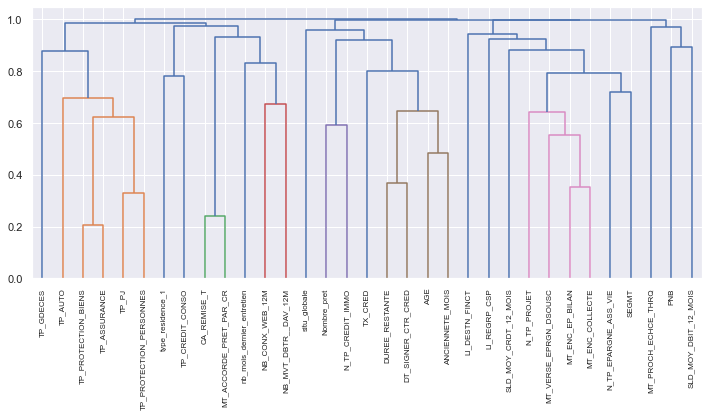

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

correlations = X.corr()

plt.figure(figsize=(12,5))

dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=X.columns, orientation='top', leaf_rotation=90);

In [24]:
selected_feat= x_train1.columns[(sel.get_support())]
len(selected_feat)

15

In [25]:
print(selected_feat)

Index(['CA_REMISE_T', 'PNB', 'NB_CONX_WEB_12M', 'MT_ENC_EP_BILAN',
       'MT_ENC_COLLECTE', 'NB_MVT_DBTR__DAV_12M', 'SLD_MOY_DBIT_12_MOIS',
       'SLD_MOY_CRDT_12_MOIS', 'AGE', 'ANCIENNETE_MOIS', 'TX_CRED',
       'DUREE_RESTANTE', 'MT_ACCORDE_PRET_PAR_CR', 'MT_PROCH_ECHCE_THRQ',
       'MT_VERSE_EPRGN_DSOUSC'],
      dtype='object')


In [26]:
X1 = X[selected_feat]

### Correlation 

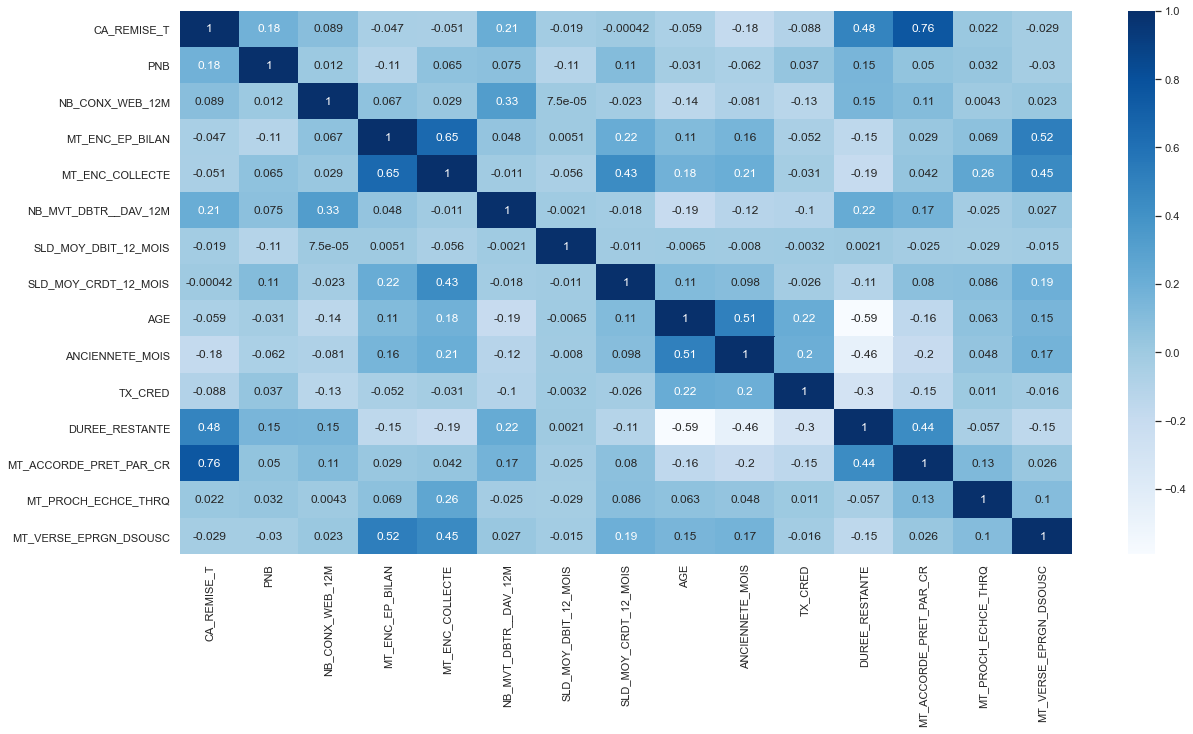

In [27]:
sns.set_style("darkgrid")
fig = plt.figure(figsize = (20, 10))
matrix = X1.corr()
dataplot = sns.heatmap(matrix, cmap="Blues", annot=True)
plt.show()

In [28]:
X1

,CA_REMISE_T,PNB,NB_CONX_WEB_12M,MT_ENC_EP_BILAN,MT_ENC_COLLECTE,NB_MVT_DBTR__DAV_12M,SLD_MOY_DBIT_12_MOIS,SLD_MOY_CRDT_12_MOIS,AGE,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR,MT_PROCH_ECHCE_THRQ,MT_VERSE_EPRGN_DSOUSC
0,611.34,94.34,344.0,6264.89,6795.99,533.0,0.0,1416.0,39.0,104.0,1.19,19.0,39800.00,297.13,1400.00
1,611.34,121.21,327.0,8800.00,9187.53,529.0,0.0,1111.0,41.0,127.0,1.19,19.0,39800.00,297.13,1400.00
2,5006.14,-137.12,128.0,4138.09,4189.09,471.0,0.0,689.0,27.0,207.0,1.44,261.0,120340.00,478.40,1200.00
3,5006.14,-90.97,190.0,1046.63,2884.52,489.0,0.0,727.0,28.0,219.0,1.44,261.0,120340.00,478.40,1200.00
4,5006.14,217.57,175.0,1724.03,3216.22,488.0,-2.0,879.0,29.0,230.0,1.44,261.0,120340.00,478.40,1200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204529,7415.23,-5134.96,154.0,16288.54,257278.70,783.0,-1448.0,60580.0,53.0,198.0,3.73,83.0,138861.94,819.85,130000.00
204530,26134.07,0.01,66.0,0.00,83.22,24.0,-20.0,21.0,32.0,4.0,1.34,299.0,245427.00,964.06,0.00
204531,962.88,738.73,33.0,27883.72,87727.02,754.0,0.0,9609.0,44.0,216.0,1.34,299.0,272535.00,1070.70,17090.00
204532,52570.82,2021.17,233.0,55896.94,63112.48,584.0,-38.0,8031.0,42.0,146.0,1.07,297.0,619391.00,0.00,27175.00


### Training The Model

#### 1er entrainement

In [97]:
X3 = X1.values

In [98]:
idx1 = np.where(y == 1)
idx0 = np.where(y == 0)

x_1 = X3[idx1[0]]
x_0 = X3[idx0[0]]

y_1 = y[idx1[0]]
y_0 = y[idx0[0]]

In [99]:
from sklearn.model_selection import train_test_split

x_train1, x_test_1, y_train1, y_test_1 = train_test_split(x_1, y_1 , test_size = 0.1, random_state = 4)

In [100]:
import random
l = [i for i in range(x_0.shape[0])]
idx_test = random.sample(l, x_test_1.shape[0])

In [101]:
x_test_0 = x_0[idx_test]
y_test_0 = y_0[idx_test]

In [102]:
x_test = np.concatenate((x_test_0, x_test_1), axis = 0)
y_test = np.concatenate((y_test_0, y_test_1), axis = 0)

In [103]:
x_train0 = np.delete(x_0, idx_test, 0)
y_train0 = np.delete(y_0, idx_test, 0)

In [104]:
x_train = np.concatenate((x_train0, x_train1), axis = 0)
y_train = np.concatenate((y_train0, y_train1), axis = 0)

### Feature Scaling 

In [105]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_sc = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

In [106]:
X_sc = pd.DataFrame(X_sc)
X_sc.columns = X1.columns

In [107]:
X_sc

,CA_REMISE_T,PNB,NB_CONX_WEB_12M,MT_ENC_EP_BILAN,MT_ENC_COLLECTE,NB_MVT_DBTR__DAV_12M,SLD_MOY_DBIT_12_MOIS,SLD_MOY_CRDT_12_MOIS,AGE,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR,MT_PROCH_ECHCE_THRQ,MT_VERSE_EPRGN_DSOUSC
0,-0.955412,-0.348434,0.476827,-0.355682,-0.346965,-0.372561,0.023379,-0.302796,-0.574712,-0.716501,-0.610605,-1.619626,-1.122042,-0.091477,-0.363450
1,-0.955412,-0.331460,0.402601,-0.302204,-0.326126,-0.382239,0.023379,-0.318556,-0.391617,-0.563667,-0.610605,-1.619626,-1.122042,-0.091477,-0.363450
2,-0.530603,-0.494644,-0.466280,-0.400548,-0.369681,-0.522575,0.023379,-0.340361,-1.673282,-0.032073,-0.321985,1.173438,-0.310149,-0.079944,-0.367937
3,-0.530603,-0.465491,-0.195573,-0.465763,-0.381049,-0.479023,0.023379,-0.338397,-1.581735,0.047666,-0.321985,1.173438,-0.310149,-0.079944,-0.367937
4,-0.530603,-0.270591,-0.261067,-0.451473,-0.378158,-0.481442,0.023211,-0.330543,-1.490187,0.120760,-0.321985,1.173438,-0.310149,-0.079944,-0.367937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199208,-0.165842,-0.252216,0.044570,-0.477153,-0.357056,-0.803246,0.023379,-0.323051,0.706954,-0.955718,0.082084,-0.188469,-0.580259,-0.077359,-0.394519
199209,-0.856932,-1.706720,4.301651,-0.419006,-0.357972,0.679956,0.022959,-0.265490,-0.757807,0.665645,-0.321985,-0.430843,-0.681832,-0.080401,-0.371750
199210,-0.932235,0.920558,-0.339659,-0.487684,-0.388058,-0.885512,0.022455,-0.322638,-1.856378,-1.208225,-0.564426,1.485060,0.103942,-0.070565,-0.394632
199211,-0.066929,0.335990,-0.719522,-0.487841,-0.308275,0.268627,0.023379,-0.031731,-1.307092,0.346688,-0.714508,1.311937,0.443881,-0.110382,-0.394856


In [108]:
X_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199213 entries, 0 to 199212
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CA_REMISE_T             199213 non-null  float64
 1   PNB                     199213 non-null  float64
 2   NB_CONX_WEB_12M         199213 non-null  float64
 3   MT_ENC_EP_BILAN         199213 non-null  float64
 4   MT_ENC_COLLECTE         199213 non-null  float64
 5   NB_MVT_DBTR__DAV_12M    199213 non-null  float64
 6   SLD_MOY_DBIT_12_MOIS    199213 non-null  float64
 7   SLD_MOY_CRDT_12_MOIS    199213 non-null  float64
 8   AGE                     199213 non-null  float64
 9   ANCIENNETE_MOIS         199213 non-null  float64
 10  TX_CRED                 199213 non-null  float64
 11  DUREE_RESTANTE          199213 non-null  float64
 12  MT_ACCORDE_PRET_PAR_CR  199213 non-null  float64
 13  MT_PROCH_ECHCE_THRQ     199213 non-null  float64
 14  MT_VERSE_EPRGN_DSOUS

In [109]:
X33 = X_sc.values

In [110]:
idx1 = np.where(y_train == 1)
idx0 = np.where(y_train == 0)

x_train1 = X33[idx1[0]]
x_train0 = X33[idx0[0]]

y_train1 = y_train[idx1[0]]
y_train0 = y_train[idx0[0]]

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

classifier_S = SVC(kernel = 'linear', random_state = 0, C = 1)
classifier_V = SVC(kernel = 'rbf', random_state = 0, C = 1)
classifier_K = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
classifier_R =  RandomForestClassifier(n_estimators = 15, criterion = 'entropy', random_state = 0)
classifier_L =  LogisticRegression()
classifier_E =  ExtraTreesClassifier(n_estimators = 100, random_state = 5)
classifier_X =  XGBClassifier()

Classifier = [classifier_S, classifier_V, classifier_R, classifier_K, classifier_L, classifier_E, classifier_X]

Name_Clf = ['Linear SVM', 'Kernel SVM', 'Random Forest', 'KNN' , 'Logistic Regression', 'Extratress', 'XgBoost']

In [112]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [113]:
def cross_validation(x_train0, y_train0, x_train1, y_train1, cls) : 
    precision = []
    recall = []
    f1 = []
    accurracy = []
    precision_average = []
    recall_average = []
    l = [i for i in range(x_train0.shape[0])]
    for k in range(10) :
        x_train_1, x_val_1, y_train_1, y_val_1 = train_test_split(x_train1, y_train1 , test_size = 0.2, random_state = 4)
        idx_train = random.sample(l, x_train_1.shape[0])
        l = [ele for ele in l if ele not in idx_train]
        idx_val = random.sample(l, x_val_1.shape[0])
        l = [ele for ele in l if ele not in idx_val]
        x_train_0 = x_train0[idx_train]
        y_train_0 = y_train0[idx_train]
        x_val_0 = x_train0[idx_val]
        y_val_0 = y_train0[idx_val]
        x_train = np.concatenate((x_train_0, x_train_1), axis = 0)
        y_train = np.concatenate((y_train_0, y_train_1), axis = 0)
        x_val = np.concatenate((x_val_0, x_val_1), axis = 0)
        y_val = np.concatenate((y_val_0, y_val_1), axis = 0)
        cls.fit(x_train, y_train)
        y_pred = cls.predict(x_val)
        precision.append(precision_score(y_val, y_pred))
        recall.append(recall_score(y_val, y_pred))
        f1.append(f1_score(y_val, y_pred))
        accurracy.append(accuracy_score(y_val, y_pred))
        precision_average.append(precision_score(y_val, y_pred, average = None))
        recall_average.append(recall_score(y_val, y_pred, average = None))
    return np.mean(precision), np.mean(recall), np.mean(f1), np.mean(accurracy)

In [114]:
Precision = []
Recall = []
F1 = []
Accurracy = []

for cls in Classifier :
    p, r, f, a = cross_validation(x_train0, y_train0, x_train1, y_train1, cls)
    Precision.append(p)
    Recall.append(r)
    F1.append(f)
    Accurracy.append(a)

[23:48:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [115]:
color4 = ['rgb(26, 140, 255)', 'rgb(77, 77, 255)', 'rgb(0, 0, 179)', 'rgb(204, 204, 255)', 'rgb(153, 235, 255)',
          'rgb(0, 133, 230)', 'rgb(0, 102, 128)']

In [116]:
pourcentage_data = pd.DataFrame()
pourcentage_data['Classifier'] = Name_Clf
pourcentage_data['Accuracy'] = Accurracy
pourcentage_data['Precision'] = Precision
pourcentage_data['Recall'] = Recall
pourcentage_data['F1'] = F1

In [117]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['Accuracy', 'Precision', 'Recall', 'F1'])

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Accuracy'],
               marker_color=color4),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Precision'],
               marker_color=color4),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Recall'],
               marker_color=color4),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['F1'],
               marker_color=color4),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Evalution des Classfieurs")
fig.show()

### Feature Importance

In [29]:
color5 = ['rgb(204, 204, 255)', 'rgb(77, 77, 255)', 'rgb(153, 235, 255)', 'rgb(0, 184, 230)', 'rgb(0, 102, 128)', 
         'rgb(0, 0, 179)', 'rgb(0, 0, 102)', 'rgb(26, 140, 255)', 'rgb(0, 133, 230)', 'rgb(128, 183, 255)', 'rgb(51, 102, 255)',
        'rgb(0, 13, 51)', 'rgb(230, 236, 255)', 'rgb(102, 179, 255)', 'rgb(0, 255, 255)', 'rgb(128, 255, 255)']

In [119]:
feature_importance = pd.DataFrame()
feature_importance['Columns'] = X_sc.columns
feature_importance['xgboost'] = classifier_X.feature_importances_
feature_importance['extratrees'] = classifier_E.feature_importances_
feature_importance['random_forest'] = classifier_R.feature_importances_
feature_importance['logistic_regression'] = classifier_L.coef_[0]

In [120]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['xgboost', 'extratrees', 'r forest', 'l regresion'])

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['xgboost'],
               marker_color=color5),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['extratrees'],
               marker_color=color5),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['random_forest'],
               marker_color=color5),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['logistic_regression'],
               marker_color=color5),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Feature Importance")
fig.show()

### Deuxieme entrainement 

In [30]:
X2 = X1.drop(['MT_ENC_COLLECTE','MT_ENC_EP_BILAN','SLD_MOY_CRDT_12_MOIS', 'MT_VERSE_EPRGN_DSOUSC',
                 'SLD_MOY_DBIT_12_MOIS'], axis = 1)

In [122]:
X3 = X2.values

In [123]:
idx1 = np.where(y == 1)
idx0 = np.where(y == 0)

x_1 = X3[idx1[0]]
x_0 = X3[idx0[0]]

y_1 = y[idx1[0]]
y_0 = y[idx0[0]]

In [124]:
from sklearn.model_selection import train_test_split

x_train1, x_test_1, y_train1, y_test_1 = train_test_split(x_1, y_1 , test_size = 0.1, random_state = 4)

In [125]:
import random
l = [i for i in range(x_0.shape[0])]
idx_test = random.sample(l, x_test_1.shape[0])

In [126]:
x_test_0 = x_0[idx_test]
y_test_0 = y_0[idx_test]

In [127]:
x_test = np.concatenate((x_test_0, x_test_1), axis = 0)
y_test = np.concatenate((y_test_0, y_test_1), axis = 0)

In [128]:
x_train0 = np.delete(x_0, idx_test, 0)
y_train0 = np.delete(y_0, idx_test, 0)

In [129]:
x_train = np.concatenate((x_train0, x_train1), axis = 0)
y_train = np.concatenate((y_train0, y_train1), axis = 0)

### Feature Scaling 

In [130]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_sc = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

In [131]:
X_sc = pd.DataFrame(X_sc)
X_sc.columns = X2.columns

In [132]:
X_sc

,CA_REMISE_T,PNB,NB_CONX_WEB_12M,NB_MVT_DBTR__DAV_12M,AGE,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR,MT_PROCH_ECHCE_THRQ
0,-0.955574,-0.348377,0.476870,-0.372608,-0.574690,-0.716326,-0.610713,-1.620142,-1.122189,-0.091505
1,-0.955574,-0.331420,0.402643,-0.382287,-0.391591,-0.563497,-0.610713,-1.620142,-1.122189,-0.091505
2,-0.530777,-0.494447,-0.466242,-0.522637,-1.673290,-0.031915,-0.322073,1.173304,-0.310348,-0.079975
3,-0.530777,-0.465323,-0.195534,-0.479080,-1.581740,0.047822,-0.322073,1.173304,-0.310348,-0.079975
4,-0.530777,-0.270608,-0.261028,-0.481500,-1.490190,0.120915,-0.322073,1.173304,-0.310348,-0.079975
...,...,...,...,...,...,...,...,...,...,...
199208,-0.166027,-0.252250,0.044610,-0.803337,0.707009,-0.955538,0.082024,-0.188789,-0.580441,-0.077390
199209,-0.857097,-1.705370,4.301714,0.680017,-0.757790,0.665786,-0.322073,-0.431196,-0.682007,-0.080431
199210,-0.932398,0.919407,-0.339621,-0.885611,-1.856390,-1.208039,-0.564531,1.484970,0.103718,-0.070597
199211,-0.067117,0.335396,-0.719485,0.268647,-1.307090,0.346837,-0.714624,1.311822,0.443635,-0.110405


In [133]:
X_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199213 entries, 0 to 199212
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CA_REMISE_T             199213 non-null  float64
 1   PNB                     199213 non-null  float64
 2   NB_CONX_WEB_12M         199213 non-null  float64
 3   NB_MVT_DBTR__DAV_12M    199213 non-null  float64
 4   AGE                     199213 non-null  float64
 5   ANCIENNETE_MOIS         199213 non-null  float64
 6   TX_CRED                 199213 non-null  float64
 7   DUREE_RESTANTE          199213 non-null  float64
 8   MT_ACCORDE_PRET_PAR_CR  199213 non-null  float64
 9   MT_PROCH_ECHCE_THRQ     199213 non-null  float64
dtypes: float64(10)
memory usage: 15.2 MB


In [134]:
X33 = X_sc.values

In [135]:
idx1 = np.where(y_train == 1)
idx0 = np.where(y_train == 0)

x_train1 = X33[idx1[0]]
x_train0 = X33[idx0[0]]

y_train1 = y_train[idx1[0]]
y_train0 = y_train[idx0[0]]

In [136]:
Precision = []
Recall = []
F1 = []
Accurracy = []

for cls in Classifier :
    p, r, f, a = cross_validation(x_train0, y_train0, x_train1, y_train1, cls)
    Precision.append(p)
    Recall.append(r)
    F1.append(f)
    Accurracy.append(a)

[00:00:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:00:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [137]:
pourcentage_data = pd.DataFrame()
pourcentage_data['Classifier'] = Name_Clf
pourcentage_data['Accuracy'] = Accurracy
pourcentage_data['Precision'] = Precision
pourcentage_data['Recall'] = Recall
pourcentage_data['F1'] = F1

In [138]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['Accuracy', 'Precision', 'Recall', 'F1'])

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Accuracy'],
               marker_color=color4),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Precision'],
               marker_color=color4),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Recall'],
               marker_color=color4),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['F1'],
               marker_color=color4),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Evalution des Classfieurs")
fig.show()

### Feature Importance

In [139]:
feature_importance = pd.DataFrame()
feature_importance['Columns'] = X2.columns
feature_importance['xgboost'] = classifier_X.feature_importances_
feature_importance['extratrees'] = classifier_E.feature_importances_
feature_importance['random_forest'] = classifier_R.feature_importances_
feature_importance['logistic_regression'] = classifier_L.coef_[0]

In [140]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['xgboost', 'extratrees', 'r forest', 'l regresion'])

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['xgboost'],
               marker_color=color5),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['extratrees'],
               marker_color=color5),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['random_forest'],
               marker_color=color5),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =feature_importance['Columns'],
                y = feature_importance['logistic_regression'],
               marker_color=color5),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Feature Importance")
fig.show()

### Outliers Analysis 

In [31]:
from sklearn.ensemble import IsolationForest

In [32]:
X4 = X1.drop(['MT_ENC_COLLECTE','MT_ENC_EP_BILAN','SLD_MOY_CRDT_12_MOIS', 'MT_VERSE_EPRGN_DSOUSC',
                 'SLD_MOY_DBIT_12_MOIS'], axis = 1)

In [33]:
X4['BARCODE'] = y

In [34]:
model = IsolationForest(contamination = float(0.4))

DATA = []

l = [0, 1]

for j in l:
    iso_data = X4[X4['BARCODE'] == j]
    idxj = np.where(y == j)
    yj = y[idxj[0]]
    
    model.fit(iso_data)

    score = model.decision_function(iso_data.values)
    predict = model.predict(iso_data.values)
    
    iso_data['scores'] = score
    iso_data['anomaly'] = predict
    
    iso_data['BARCODE'] = yj
    
    iso_data = iso_data[iso_data['anomaly'] == 1]
    
    iso_data = iso_data.drop(['scores', 'anomaly'], axis = 1)
    
    DATA.append(iso_data)

X5 = pd.concat(DATA)

In [35]:
X5

,CA_REMISE_T,PNB,NB_CONX_WEB_12M,NB_MVT_DBTR__DAV_12M,AGE,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR,MT_PROCH_ECHCE_THRQ,BARCODE
2,5006.14,-137.12,128.0,471.0,27.0,207.0,1.44,261.0,120340.00,478.40,0
3,5006.14,-90.97,190.0,489.0,28.0,219.0,1.44,261.0,120340.00,478.40,0
4,5006.14,217.57,175.0,488.0,29.0,230.0,1.44,261.0,120340.00,478.40,0
8,2844.01,1132.72,44.0,575.0,51.0,411.0,1.00,18.0,41922.05,263.69,0
10,5699.69,1184.04,300.0,653.0,28.0,204.0,1.44,273.0,111322.00,442.53,0
...,...,...,...,...,...,...,...,...,...,...,...
202200,15921.03,1032.76,136.0,1008.0,35.0,308.0,1.22,278.0,273166.00,1057.27,1
202275,11601.16,1143.32,507.0,1329.0,31.0,152.0,1.00,223.0,164954.00,758.61,1
202305,5176.90,560.99,219.0,500.0,31.0,1.0,1.15,218.0,112346.00,524.23,1
203169,16628.76,1526.37,140.0,769.0,45.0,188.0,1.00,219.0,155700.00,716.06,1


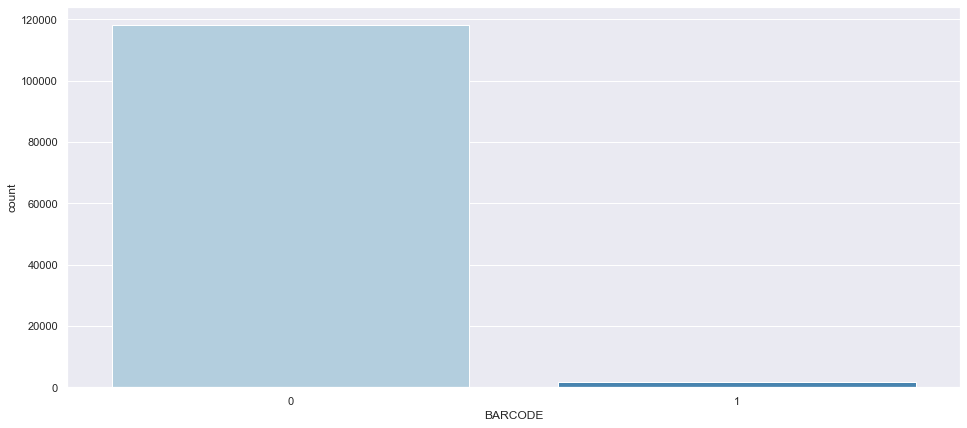

In [36]:
sns.set_style("darkgrid")
fig = plt.figure(figsize = (16, 7))
sns.countplot('BARCODE', data = X5, palette= "Blues")
plt.show()

In [37]:
fig = px.box(X5, y='CA_REMISE_T', color="BARCODE", color_discrete_sequence=color)
fig.show()

### Feature Scaling 

In [147]:
X6 = X5.drop('BARCODE', axis = 1)
y = X5['BARCODE'].values

In [148]:
columnss = X6.columns

In [149]:
columnss

Index(['CA_REMISE_T', 'PNB', 'NB_CONX_WEB_12M', 'NB_MVT_DBTR__DAV_12M', 'AGE',
       'ANCIENNETE_MOIS', 'TX_CRED', 'DUREE_RESTANTE',
       'MT_ACCORDE_PRET_PAR_CR', 'MT_PROCH_ECHCE_THRQ'],
      dtype='object')

In [150]:
X3 = X6.values

In [151]:
idx1 = np.where(y == 1)
idx0 = np.where(y == 0)

x_1 = X3[idx1[0]]
x_0 = X3[idx0[0]]

y_1 = y[idx1[0]]
y_0 = y[idx0[0]]

In [152]:
from sklearn.model_selection import train_test_split

x_train1, x_test_1, y_train1, y_test_1 = train_test_split(x_1, y_1 , test_size = 0.1, random_state = 4)

In [153]:
import random
l = [i for i in range(x_0.shape[0])]
idx_test = random.sample(l, x_test_1.shape[0])

In [154]:
x_test_0 = x_0[idx_test]
y_test_0 = y_0[idx_test]

In [155]:
x_test = np.concatenate((x_test_0, x_test_1), axis = 0)
y_test = np.concatenate((y_test_0, y_test_1), axis = 0)

In [156]:
x_train0 = np.delete(x_0, idx_test, 0)
y_train0 = np.delete(y_0, idx_test, 0)

In [157]:
x_train = np.concatenate((x_train0, x_train1), axis = 0)
y_train = np.concatenate((y_train0, y_train1), axis = 0)

### Feature Scaling 

In [158]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

X_sc = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

In [159]:
X_sc = pd.DataFrame(X_sc)
X_sc.columns = X6.columns

In [160]:
X_sc

,CA_REMISE_T,PNB,NB_CONX_WEB_12M,NB_MVT_DBTR__DAV_12M,AGE,ANCIENNETE_MOIS,TX_CRED,DUREE_RESTANTE,MT_ACCORDE_PRET_PAR_CR,MT_PROCH_ECHCE_THRQ
0,-1.211362,-0.474461,0.967243,-0.404165,-0.489703,-0.703919,-0.786736,-1.928479,-1.483157,-1.221481
1,-1.211362,-0.445973,0.848091,-0.415935,-0.282978,-0.524565,-0.786736,-1.928479,-1.483157,-1.221481
2,-0.542136,-0.719855,-0.546686,-0.586605,-1.730056,0.099278,-0.368067,1.265235,-0.195210,-0.637784
3,-0.542136,-0.670927,-0.112132,-0.533639,-1.626693,0.192854,-0.368067,1.265235,-0.195210,-0.637784
4,-0.542136,-0.343812,-0.217266,-0.536581,-1.523331,0.278633,-0.368067,1.265235,-0.195210,-0.637784
...,...,...,...,...,...,...,...,...,...,...
119523,1.532498,0.158343,0.876127,0.190238,-1.419968,-1.382348,-1.289139,0.644968,1.623938,1.229002
119524,-0.497321,0.223174,0.469609,-0.942659,-1.523331,-1.444733,-0.987697,1.384009,-0.262950,-0.755670
119525,4.300334,-0.389178,1.163493,1.067130,-0.179615,0.426795,-0.116866,1.238840,1.711747,0.945510
119526,4.761894,-0.553880,0.259341,1.390815,0.647286,-1.125013,-0.535535,0.552588,1.886453,1.350978


In [161]:
X_sc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CA_REMISE_T             119528 non-null  float64
 1   PNB                     119528 non-null  float64
 2   NB_CONX_WEB_12M         119528 non-null  float64
 3   NB_MVT_DBTR__DAV_12M    119528 non-null  float64
 4   AGE                     119528 non-null  float64
 5   ANCIENNETE_MOIS         119528 non-null  float64
 6   TX_CRED                 119528 non-null  float64
 7   DUREE_RESTANTE          119528 non-null  float64
 8   MT_ACCORDE_PRET_PAR_CR  119528 non-null  float64
 9   MT_PROCH_ECHCE_THRQ     119528 non-null  float64
dtypes: float64(10)
memory usage: 9.1 MB


In [162]:
X33 = X_sc.values

In [163]:
idx1 = np.where(y_train == 1)
idx0 = np.where(y_train == 0)

x_train1 = X33[idx1[0]]
x_train0 = X33[idx0[0]]

y_train1 = y_train[idx1[0]]
y_train0 = y_train[idx0[0]]

In [164]:
pickle.dump(sc, open('scaler_stock.pkl','wb'))

#### 3eme entrainement

In [165]:
Precision = []
Recall = []
F1 = []
Accurracy = []

for cls in Classifier :
    p, r, f, a = cross_validation(x_train0, y_train0, x_train1, y_train1, cls)
    Precision.append(p)
    Recall.append(r)
    F1.append(f)
    Accurracy.append(a)

[00:06:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [166]:
pourcentage_data = pd.DataFrame()
pourcentage_data['Classifier'] = Name_Clf
pourcentage_data['Accuracy'] = Accurracy
pourcentage_data['Precision'] = Precision
pourcentage_data['Recall'] = Recall
pourcentage_data['F1'] = F1

In [167]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['Accuracy', 'Precision', 'Recall', 'F1'])

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Accuracy'],
               marker_color=color4),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Precision'],
               marker_color=color4),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Recall'],
               marker_color=color4),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['F1'],
               marker_color=color4),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Evalution des Classfieurs")
fig.show()

# Grid Search

In [168]:
def grid_search(param, x_train0, y_train0, x_train1, y_train1, cls) :
    n = len(list(param.keys()))
    acc = []
    precision = []
    Recall = []
    F1 = []
    dict_all = []
    for i in range(100) :
        dict_pr = {}
        for j in range(n) :
            dict_pr[list(param.keys())[j]] = random.choice(param[list(param.keys())[j]])
        cls.set_params(**dict_pr)
        dict_all.append(dict_pr)
        pre, recall, f1, accuracy = cross_validation(x_train0, y_train0, x_train1, y_train1, cls)
        acc.append(accuracy)
        precision.append(pre)
        Recall.append(recall)
        F1.append(f1)
    return dict_all[max(acc)], acc[max(acc)]

### XGBOOST

In [169]:
parameters = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

parameters = {'gamma': 0,
 'learning_rate': 0.25,
 'max_depth': 13,
 'n_estimators': 115,
 'reg_alpha': 0.1,
 'reg_lambda': 0}

accuracy = 0.8214141414141414

### Random Forest

In [170]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

parameters = {'n_estimators': 1000,
 'max_features': 'auto',
 'max_depth': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'bootstrap': False}

accuracy = 0.8371717171717172

### ExtraTrees

In [171]:
param_grid_ext = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'criterion': ['gini', 'entropy'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_sample_split': [2,4,6],
    'min_sample_leaf': [1,2],
    'oob_score': [True, False],
    'max_features': ['auto','sqrt','log2'],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
}

parameters = {'n_estimators': 1800,
 'max_features': 'auto',
 'max_depth': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'bootstrap': False}

accuracy = 0.8115151515151515

In [172]:
classifier_r = RandomForestClassifier()
dict_pr_r = {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': 110, 'min_samples_split': 2, 
             'min_samples_leaf': 1, 'bootstrap': False}
classifier_r.set_params(**dict_pr_r)
classifier_e =  ExtraTreesClassifier()
dict_pr_e = {'n_estimators': 1800, 'max_features': 'auto', 'max_depth': 30, 'min_samples_split': 2, 
             'min_samples_leaf': 1, 'bootstrap': False}
classifier_e.set_params(**dict_pr_e)
classifier_x =  XGBClassifier()
dict_pr_x = {'gamma': 0, 'learning_rate': 0.25, 'max_depth': 13, 'n_estimators': 115, 'reg_alpha': 0.1, 'reg_lambda': 0}
classifier_x.set_params(**dict_pr_x)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=0, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.25, max_delta_step=None, max_depth=13,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=115, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=0.1, reg_lambda=0,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [173]:
classifier = [classifier_r, classifier_e, classifier_x]

In [174]:
Precision = []
Recall = []
F1 = []
Accurracy = []

for cls in classifier :
    p, r, f, a = cross_validation(x_train0, y_train0, x_train1, y_train1, cls)
    Precision.append(p)
    Recall.append(r)
    F1.append(f)
    Accurracy.append(a)

[00:09:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:10:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:10:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [175]:
Name_Clf = ['Random Forest', 'Extratress', 'XgBoost']
pourcentage_data = pd.DataFrame()
pourcentage_data['Classifier'] = Name_Clf
pourcentage_data['Accuracy'] = Accurracy
pourcentage_data['Precision'] = Precision
pourcentage_data['Recall'] = Recall
pourcentage_data['F1'] = F1

In [176]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2, shared_xaxes=True, subplot_titles = ['Accuracy', 'Precision', 'Recall', 'F1'])

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Accuracy'],
               marker_color=color4),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Precision'],
               marker_color=color4),
    row=1, col=2
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['Recall'],
               marker_color=color4),
    row=2, col=1
)

fig.add_trace(
    go.Bar(x =pourcentage_data['Classifier'],
                y = pourcentage_data['F1'],
               marker_color=color4),
    row=2, col=2
)

fig.update_layout(height=800, width=950, title_text="Evalution des Classfieurs")
fig.show()

In [177]:
filename = 'random_forest_stock.sav'
pickle.dump(classifier_r, open(filename, 'wb'))
filename1 = 'extratrees_stock.sav'
pickle.dump(classifier_e, open(filename1, 'wb'))
filename2 = 'xgboost_stock.sav'
pickle.dump(classifier_x, open(filename2, 'wb'))

In [178]:
x_test2 = sc.inverse_transform(x_test1)
test = pd.DataFrame(x_test2)
test.columns = columnss
test['BARCODE'] = y_test

In [179]:
path_test = r'D:\ECM\DigitalLab\Projet_2\final_data\test_stock.csv'
test.to_csv(path_test)